In [11]:
#imports
import requests
import json
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#copie du lien permettant de faire une requête à l'api
link = "https://data.nantesmetropole.fr/api/explore/v2.1/catalog/datasets/244400404_stations-velos-libre-service-nantes-metropole-disponibilites/records?limit=20&offset=0"

In [3]:
#requête à l'api
r = requests.get(link)

In [4]:
#enregistrement du résultat dans un dictionnaire
bikes_dict = r.json()

In [5]:
#affichage du dictionnaire
pprint(bikes_dict)

{'results': [{'address': 'Allée de la Bourse - Boulevard des Nations-Unies',
              'available_bike_stands': 7,
              'available_bikes': 15,
              'banking': 'True',
              'bike_stands': 22,
              'bonus': 'False',
              'contract_name': 'nantes',
              'last_update': '2024-11-18T14:15:45+00:00',
              'name': '031-BOURSE',
              'number': 31,
              'position': {'lat': 47.2120830307532, 'lon': -1.55908655123987},
              'status': 'OPEN'},
             {'address': '5, boulevard de Berlin',
              'available_bike_stands': 5,
              'available_bikes': 15,
              'banking': 'False',
              'bike_stands': 20,
              'bonus': 'False',
              'contract_name': 'nantes',
              'last_update': '2024-11-18T14:15:25+00:00',
              'name': '051-TABARLY',
              'number': 51,
              'position': {'lat': 47.2141946314965, 'lon': -1.52973588598036},

In [6]:
#enregistrement d'une liste contenant le nom des colonnes que je vais garder
cols = ['address', 'available_bikes', 'bike_stands']

In [7]:
#enregistrement des colonnes que je vais utiliser dans un dataframe
df_bikes = pd.json_normalize(bikes_dict, record_path = 'results')[cols]

In [8]:
#ajout d'une colonne 'taux_remplissage' qui calcule le nombre de vélos dispos divisé par le nombre d'emplacements dispos dans la station
df_bikes['taux_remplissage'] = df_bikes.available_bikes / df_bikes.bike_stands

In [9]:
#affichage des adresses de stations et de leur taux de remplissage
display(df_bikes[['address', 'taux_remplissage']])

,address,taux_remplissage
0,Allée de la Bourse - Boulevard des Nations-Unies,0.681818
1,"5, boulevard de Berlin",0.750000
2,"42, boulevard Gabriel Guist'Hau",0.066667
3,"15, rue de Verdun",0.214286
4,"4, place Sainte Elisabeth",0.071429
5,"1, allée de l'Île Gloriette",0.851852
6,Rue de Berry - Rue des Hauts Pavés,0.250000
7,Rue Joseph Cholet,0.312500
8,Rond-Point de Louisiane,0.500000
9,Pont de la Tortière - boulevard Eugène Orieux,0.250000


In [12]:
#suppression des lignes vides
df_bikes.taux_remplissage.dropna()

,taux_remplissage
0,0.681818
1,0.750000
2,0.066667
3,0.214286
4,0.071429
5,0.851852
6,0.250000
7,0.312500
8,0.500000
9,0.250000


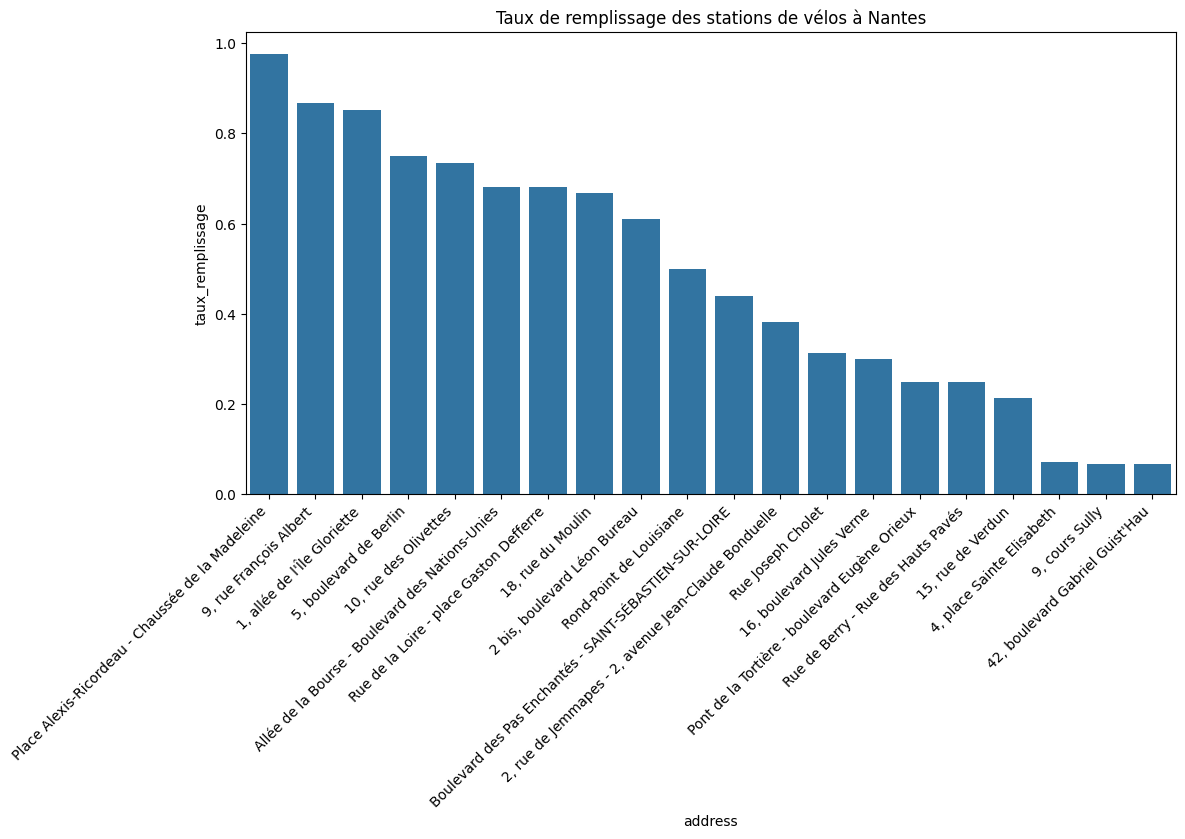

In [22]:
#affichage des taux de remplissage dans un graphique
df_bikes_sorted = df_bikes.sort_values(by='taux_remplissage', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(data=df_bikes_sorted, x='address', y='taux_remplissage')
plt.xticks(rotation=45, ha='right')
plt.title("Taux de remplissage des stations de vélos à Nantes")
plt.show()